<a href="https://colab.research.google.com/github/ChingizIbnVaxob/data-science-practices/blob/main/04.04.2024/Portfolio_Diabet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/diabetes.csv")
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
68,1,95,66,13,38,19.6,0.334,25,0
296,2,146,70,38,360,28.0,0.337,29,1
67,2,109,92,0,0,42.7,0.845,54,0
290,0,78,88,29,40,36.9,0.434,21,0
412,1,143,84,23,310,42.4,1.076,22,0
385,1,119,54,13,50,22.3,0.205,24,0
196,1,105,58,0,0,24.3,0.187,21,0
553,1,88,62,24,44,29.9,0.422,23,0
540,8,100,74,40,215,39.4,0.661,43,1
487,0,173,78,32,265,46.5,1.159,58,0


In [6]:
df.shape

(768, 9)

In [7]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient("coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970,0.074752
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
df.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [10]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

# ML

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
#k-NN
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=14)

In [41]:
y_predict = knn.predict(X_test)

# Baholash

In [42]:
from sklearn.metrics import jaccard_score

jaccard_score (y_test, y_predict)

0.515625

**Confuion matrix**

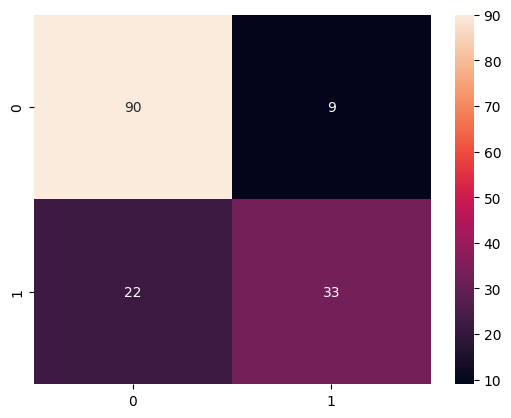

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot  as plt

sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [46]:
#cross validation

from sklearn.model_selection import cross_val_predict
predict = cross_val_predict(estimator=knn, X=X, y=y, cv=5)

# modelni baholash
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.90      0.82       500
           1       0.71      0.47      0.57       268

    accuracy                           0.75       768
   macro avg       0.74      0.68      0.70       768
weighted avg       0.74      0.75      0.73       768



**Grid search usuli**

In [59]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 20)}
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=14),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [60]:
knn_gscv.cv_results_['rank_test_score']

array([19, 18, 10, 13, 17, 16, 12, 11, 15, 14,  9,  6,  4,  7,  3,  8,  1,
        5,  2], dtype=int32)

In [61]:
knn_gscv.best_params_

{'n_neighbors': 17}

In [62]:
knn_gscv.best_score_

0.7669892199303965

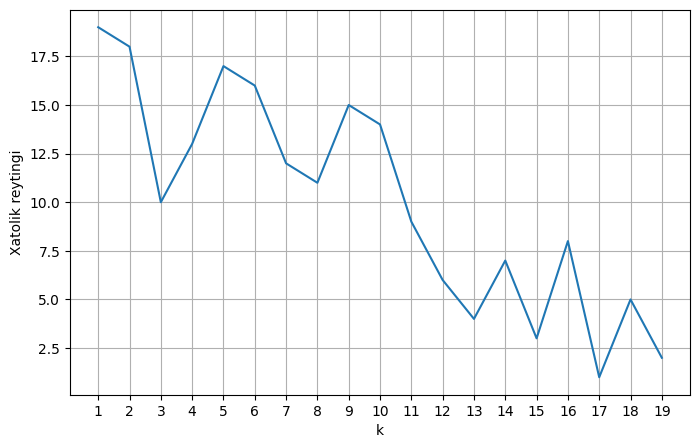

In [63]:
plt.figure(figsize=(8,5))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()